### MTH 459/559 - ch 18 American Put binomial

In [1]:
# ch18_american_put_binomial.ipynb  
import numpy as np # library for numerical & math calculations
import matplotlib.pyplot as plt # library for graphing 
import scipy.stats as sp # library with prob/stat functions

In [2]:
# binomial tree method of option valuation

# stock paramters
S0 = 9
K = 10
T = 1.
r = 0.06
sigma = 0.3

# binomial parameters for stock model
M = 100
dt = T/M
p = 0.5
nu = r - 0.5*sigma**2
u = np.exp(sigma*np.sqrt(dt)+nu*dt)
d = np.exp(-sigma*np.sqrt(dt)+nu*dt)

# stock model - need entire tree for American put
from scipy.special import comb as nchoosek
S = np.zeros((M+1, M+1))*np.NaN # array of S values at t=T
#prob = np.zeros(M+1)  #probability at t=T
for i in range(M+1): # i = 0,...,M
    for n in range(i+1): # n = 0,..,i
        S[i,n]=S0*d**(i-n)*u**(n)   # i-n down steps and n up steps
#    prob[n] = nchoosek(M,n)*p**n*(1-p)**(M-n)

# binomial tree for option values
V = np.zeros((M+1, M+1))*np.NaN # V(i,j) = option value at t_i, n down steps
Exercise = np.zeros((M+1, M+1))*np.NaN

# payout values at t=T
for n in range(M+1): # n = 0,1,...,M
    V[M,n] = max(K-S[M,n],0)    # payout function at t=T
    if(V[M,n]>0):
        Exercise[M,n]=1
    else:
        Exercise[M,n]=0

# propagate option value backwards using (18.7)
for i in range(M-1, -1, -1): # i = M-1,M-2,...,0 
    for n in range(i+1):     # n = 0,1,...,i
        V_no = np.exp(-r*dt)*(p*V[i+1,n+1]+(1-p)*V[i+1,n]) 
        V_yes = K-S[i,n]
        V[i,n]= max(V_yes,V_no)
        if(V_yes > V_no):
            Exercise[i,n]=1
        else:
            Exercise[i,n]=0
price = V[0,0]
print('American Put binomial price = ',price)

American Put binomial price =  1.4363108380168788


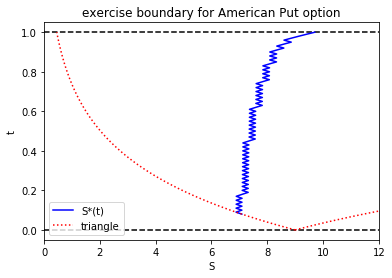

In [3]:
# exercise boundary
t = np.linspace(0,T,M+1)
Smax = np.zeros(M+1)
Smin = np.zeros(M+1)
bex = np.zeros(M+1)*np.NaN
for i in range(M, -1, -1): # i = M,M-1,...,0
    Smin[i] = S0*d**i
    Smax[i] = S0*u**i
    ifound=0
    for n in range(i,-1,-1):     # n = i,i-1,...0 to give decreasing S
        if(ifound==0 and Exercise[i,n]==1):
            ifound=1
            bex[i]=S[i,n]
plt.plot(bex,t,'b',label='S*(t)')
plt.plot(Smin,t,'r:',label='triangle')
plt.plot(Smax,t,'r:')
Smax = 12 
plt.xlim(0,Smax)
plt.hlines(T,0,Smax,colors='k',linestyles='--')
plt.hlines(0,0,Smax,colors='k',linestyles='--')
plt.title('exercise boundary for American Put option')
plt.ylabel('t'), plt.xlabel('S')
plt.legend()
plt.show()

Note:
* S*(t) has small odd/even oscillations because of discreteness of the binomial lattice  
* For t close to zero the exercise boundary may be outside of the triangle of stock prices in the binomial lattice, so it will not be found from the lattice data.

